# First part: ridge regression

In [171]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn import decomposition
from scipy.stats.stats import pearsonr  
from numpy import linalg

## Ridge regression

Ridge regression is a type of regression that introduces the concept of regularization through the alpha parameter in the ERM; at the end of this project we will see how to calibrate the value of this parameter

A regressor is a function

<img src = "images/regressor.png" width = "200">

 where <em>w</em> is a vector of real coefficients (weights), and <em>x</em> refers to the <em>x</em> component of training set

As anticipated before, the ERM is regularized by parameter <b>$\alpha$</b>

<img src= "images/ridge_regression.png" width = "350"/>

where S is the <b>design matrix</b>, the matrix of examples without labels

$\nabla(\left \| Sw - y \right \|^2 + \alpha \left \| w \right \|^2) = 2(S^TSw - S^Ty) + 2\alpha w$

since we want to minimize this function, let's set it equal to 0 and we obtain

$(S^TS + \alpha I)w = S^Ty$

$w = (S^TS + \alpha I)^{-1} S^Ty$

The regularization is needed since, without it, the vector is unstable; in particular, it can change a lot when the dataset is perturbed and let's keep in mind that we had to deal with missing values, hence we changed a fex examples and this could have led to a variance error.

### Estimator

In [172]:
class myRidgeRegressor(object):
    def __init__(self):
        pass
    
    def fit(self, S, y, alfa):
        self.w = linalg.inv(S.T.dot(S) + alfa * np.eye(S.shape[1])).dot(S.T.dot(y))
    
    def predict(self, x):
        return x.dot(self.w)

In [173]:
def square_loss(prediction, y):
    return (y - prediction) ** 2

In [174]:
def MSE(prediction, y):
    loss = square_loss(prediction, y)
    return 1/len(loss) * sum(loss)

### Loading preprocessed datasets

Let's load the preprocessed datasets, we will handle 4 cases:
1. the complete dataset with replaced missing values normalized with min-max
2. the reduced dataset (missing values have been removed) with min-max normalization
3. the complete dataset with z-score normalization
4. the reduced dataset normalized with z-score

In [175]:
min_max_norm_dataset = pd.read_csv("datasets/min_max_norm_dataset")
min_max_norm_reduced_dataset = pd.read_csv("datasets/min_max_norm_reduced_dataset")

zscore_norm_dataset = pd.read_csv("datasets/zscore_norm_dataset")
zscore_norm_reduced_dataset = pd.read_csv("datasets/zscore_norm_reduced_dataset")

In [176]:
del min_max_norm_dataset["Unnamed: 0"]
del min_max_norm_reduced_dataset["Unnamed: 0"]
del zscore_norm_dataset["Unnamed: 0"]
del zscore_norm_reduced_dataset["Unnamed: 0"]

### Splitting in training and test set

In [177]:
def split_dataset(dataset):
    y = dataset["median_house_value"]
    x = dataset.drop("median_house_value", axis = 1)
    return train_test_split(x, y, test_size = 0.2)

Now we apply the ridge regressor for the 4 datasets and compute predictions, for this part it will be used $\alpha$ = 0.1

In [178]:
ridge_regressor = myRidgeRegressor()

### First dataset

In [179]:
x_train, x_test, y_train, y_test = split_dataset(min_max_norm_dataset)

We fit the regressor with the training set, we obtain a w vector of weights that depends on alpha parameter

In [180]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.14392531, -0.08470783,  0.17065687, -0.75037801,  1.26298002,
       -2.77368869,  0.99844455,  1.27261804,  0.22009753])

and we can test the regressor on the test set to see how good predictions are done

In [181]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

10087    0.450915
13585    0.219293
3691     0.342020
14231    0.405937
6466     0.365712
11997    0.348461
5514     0.358453
10913    0.194667
18966    0.234746
14367    0.666721
dtype: float64

In [182]:
loss = square_loss(predictions, y_test)

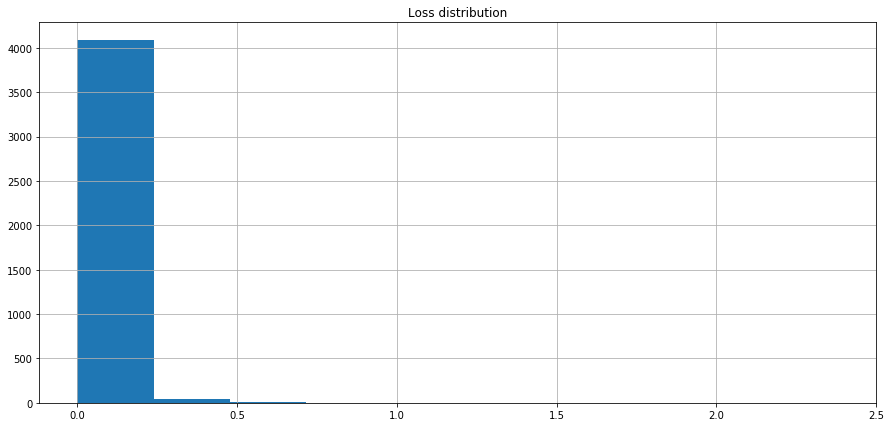

In [183]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
plt.hist(loss.values)
plt.grid()
plt.show()

In [184]:
test_error = MSE(predictions, y_test)
test_error

0.02085107829027354

In [185]:
r2_score(y_test, predictions)

0.6166321026434987

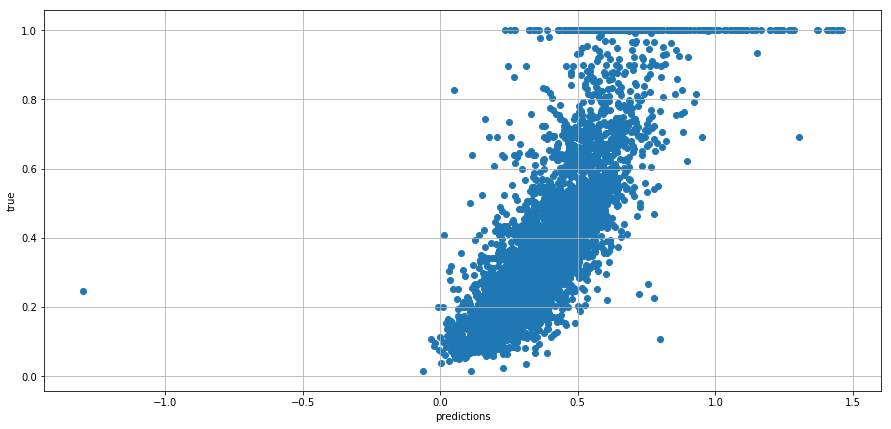

In [186]:
plt.figure(figsize=(15, 7))
plt.scatter(predictions, y_test)
plt.xlabel("predictions")
plt.ylabel("true")
plt.grid()
plt.show()

### Second dataset

In [187]:
x_train, x_test, y_train, y_test = split_dataset(min_max_norm_reduced_dataset)

In [188]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.14195396, -0.08351013,  0.16667446, -0.8081017 ,  1.25088592,
       -2.57918475,  0.98445961,  1.26386587,  0.22237054])

In [189]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

9628     0.085851
1319     0.324062
16906    0.608237
17726    0.469831
3956     0.622473
20601    0.085408
4329     0.281741
2247     0.229947
19319    0.447825
16511    0.232139
dtype: float64

In [190]:
loss = square_loss(predictions, y_test)

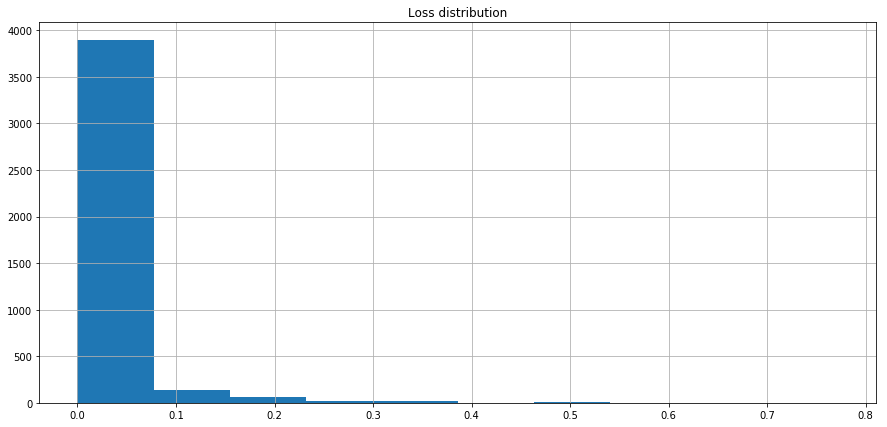

In [191]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
plt.hist(loss.values)
plt.grid()
plt.show()

In [192]:
test_error = MSE(predictions, y_test)
test_error

0.020600890925795725

In [193]:
r2_score(y_test, predictions)

0.6428308976348367

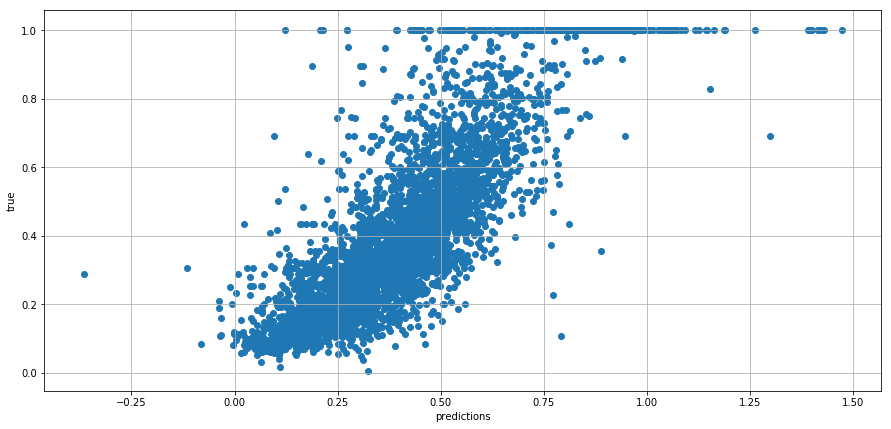

In [194]:
plt.figure(figsize=(15, 7))
plt.scatter(predictions, y_test)
plt.xlabel("predictions")
plt.ylabel("true")
plt.grid()
plt.show()

### Third dataset

In [195]:
x_train, x_test, y_train, y_test = split_dataset(zscore_norm_dataset)

In [196]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.53032642, -0.5298504 ,  0.12698755, -0.13053249,  0.35223128,
       -0.36351382,  0.19148086,  0.65094128,  0.13109671])

In [197]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

8101     0.090304
455     -0.124647
17399   -0.282687
7167    -0.396735
8285     0.683933
12440   -1.305324
13781   -0.703460
15554   -0.627906
3093    -1.039101
2113    -1.373520
dtype: float64

In [198]:
loss = square_loss(predictions, y_test)

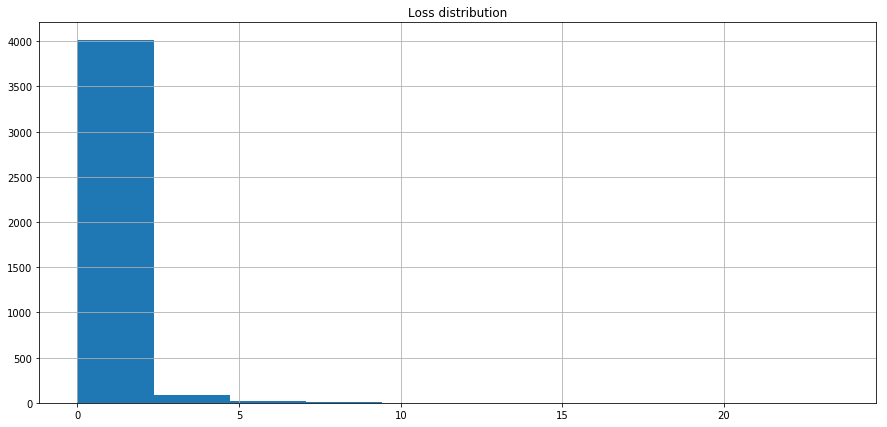

In [199]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
plt.hist(loss.values)
plt.grid()
plt.show()

In [200]:
test_error = MSE(predictions, y_test)
test_error

0.37277242877395167

In [201]:
r2_score(y_test, predictions)

0.6391706863330926

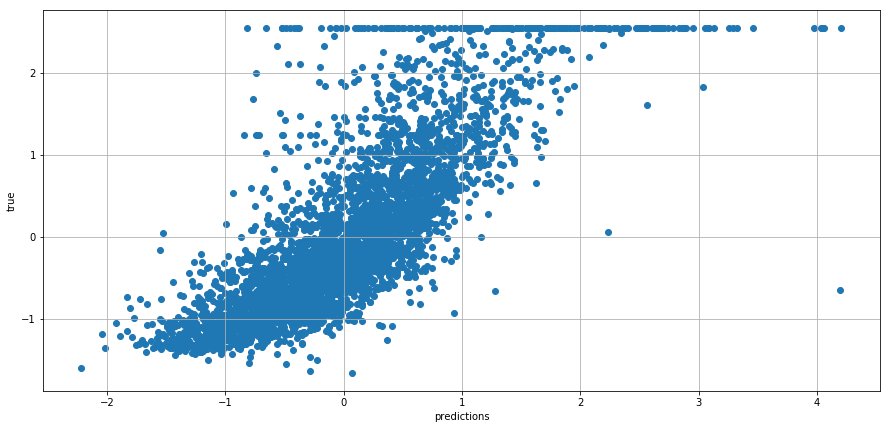

In [202]:
plt.figure(figsize=(15, 7))
plt.scatter(predictions, y_test)
plt.xlabel("predictions")
plt.ylabel("true")
plt.grid()
plt.show()

### Fourth dataset

In [203]:
x_train, x_test, y_train, y_test = split_dataset(zscore_norm_reduced_dataset)

In [204]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.54674649, -0.54712938,  0.12473739, -0.13456548,  0.3793467 ,
       -0.35742696,  0.1611521 ,  0.65606042,  0.12560998])

In [205]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

15265    0.016318
4982    -0.340214
6163     0.333739
7364    -0.540871
10011   -0.824200
11761   -0.224066
17573   -0.156780
8860     0.145945
16589   -0.702169
4290    -0.400429
dtype: float64

In [206]:
loss = square_loss(predictions, y_test)

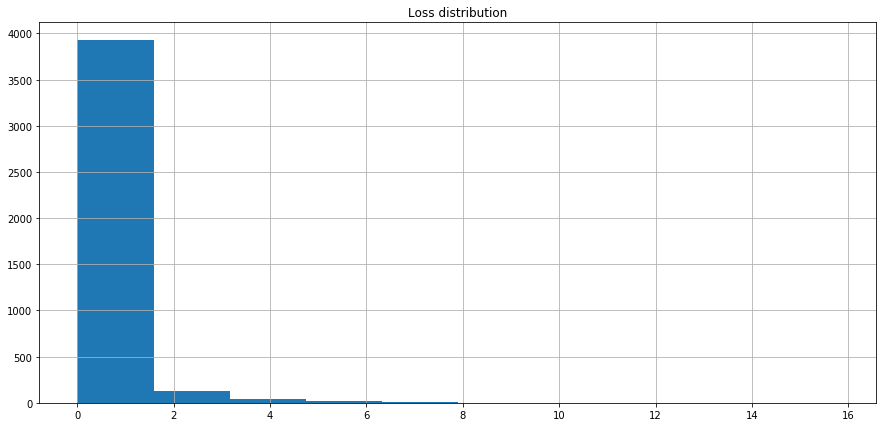

In [207]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
plt.hist(loss.values)
plt.grid()
plt.show()

In [208]:
test_error = MSE(predictions, y_test)
test_error

0.3497159481164616

In [209]:
r2_score(y_test, predictions)

0.6492267774418581

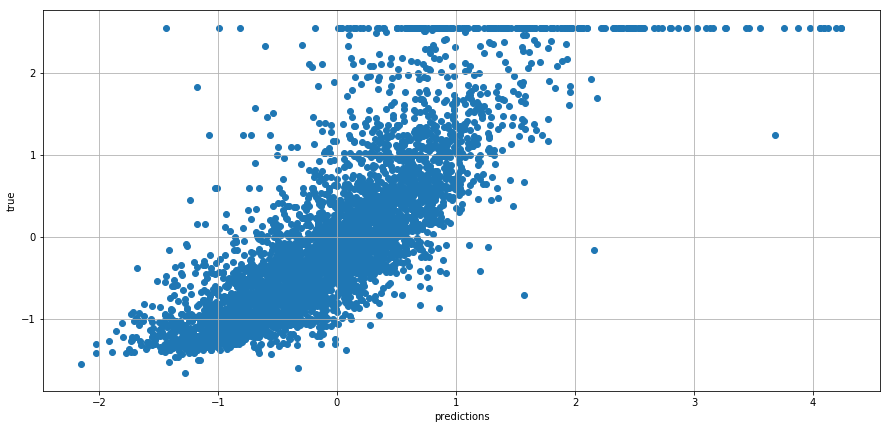

In [210]:
plt.figure(figsize=(15, 7))
plt.scatter(predictions, y_test)
plt.xlabel("predictions")
plt.ylabel("true")
plt.grid()
plt.show()

We notice a relevant difference in test error between the first two datasets with respect to the last twos, which reveals that min max normalization produces better result than z-score.
For what it concerns the replacement of missing values, we notice very little difference.

# Second part: analysis

We are dealing with a learning problem $(D, l)$ where $l$ is the square loss:

- Let $h(S)$ be the prediction of predictor $h$ on training set $S$
- Let $l_D(h(S))$ be the risk of $h(S)$
- Let $E[l_D(h)]$ be the expected risk of $h(S)$ where the expectation is with respect to the random draw of training set $S$

Hence, $E[l_D(h)]$ measures the performance of $h$ on a random training set whereas $l_D(h(S))$ measures the performance of $h$ when the training set is $S$

## K-fold cross validation

We would like to estimate $E[l_D(h)]$ to see, in general, the goodness of our predictor; in order to do this, we can use k-fold cross validation:  
let $S$ be the entire dataset, we partition $S$ in $K$ subsets (called folds) $D_1, D_2, ..., D_K$ of size $m/K$ each where $m$ is the size of $S$ and we use $S^{(k)}$ as <b>training part</b> with $S^{(k)} \equiv S \setminus D_k$ where $D_k$ is the <b>testing part</b>;
we iterate this process for $k = 1 ... K$.

In [211]:
m = len(min_max_norm_reduced_dataset)
K = 5

print(m, K)

20640 5


we choose $K$ such that $m$ is divisible with $K$

In [212]:
def k_fold_split(dataset, m, K):
    partitions = {}
    shift = int(m/K)
    pivot = 0
    for i in range(1, K+1):
        partitions[i] = dataset.iloc[pivot : pivot + shift]
        pivot = pivot + shift
    return partitions

In [213]:
partitions = k_fold_split(min_max_norm_reduced_dataset, m, K)

Now that we have $K$ folds we can proceed by iterating over them choosing the training and the testing part

In order to handle all the possible combinations of training and test set splitting, we convert the vector into a set, such that we can consider all combinations easily

In [214]:
def cross_correlation(partitions, alfa):   
    K = len(partitions)
    vec = []

    for i in range(1, K+1):
        vec.append(i)

    vec_set = set(vec)

    scores = []
    alfa = alfa

    for i in vec:
        # S^(i) means using fold i as testing part and the rest as training

        testing_part = partitions[i]
        vec_set.remove(i)
        training_part = pd.DataFrame()

        for j in vec_set:
            training_part = training_part.append(partitions[j])

        # in this point we compute scores
        y_train = training_part["median_house_value"]
        x_train = training_part.drop("median_house_value", axis = 1)

        y_test = testing_part["median_house_value"]
        x_test = testing_part.drop("median_house_value", axis = 1)

        # learning with training part
        ridge_regressor.fit(x_train, y_train, alfa)

        # testing with testing part
        result = ridge_regressor.predict(x_test)
        scores.append(MSE(result, y_test))

        vec_set.add(i)
    return scores

In [215]:
scores = cross_correlation(partitions, 0.1)
scores

[0.016340763580729875,
 0.024800620100203837,
 0.024813923588626472,
 0.027072579519510778,
 0.019559934189313052]

In [216]:
cv_estimate = np.mean(scores)
cv_estimate

0.022517564195676805

Now let's compare the cv estimate for all 4 datasets we had before

In [217]:
partitions = k_fold_split(min_max_norm_dataset, m, K)
cv_1 = np.mean(cross_correlation(partitions, 0.1))

partitions = k_fold_split(min_max_norm_reduced_dataset, m, K)
cv_2 = np.mean(cross_correlation(partitions, 0.1))

partitions = k_fold_split(zscore_norm_dataset, m, K)
cv_3 = np.mean(cross_correlation(partitions, 0.1))

partitions = k_fold_split(zscore_norm_reduced_dataset, m, K)
cv_4 = np.mean(cross_correlation(partitions, 0.1))

print(cv_1, cv_2, cv_3, cv_4)

0.022517564195676805 0.022517564195676805 0.38079181660894346 0.38079181660894346


## Dependence of the cross-validated risk estimate on the parameter alpha

For simplicity, let's consider only one dataset, we will choose the one that showed the best performance with $ \alpha = 0.1$

We will test 5000 values for $\alpha$, from 0 to 499 with a step of 0.1

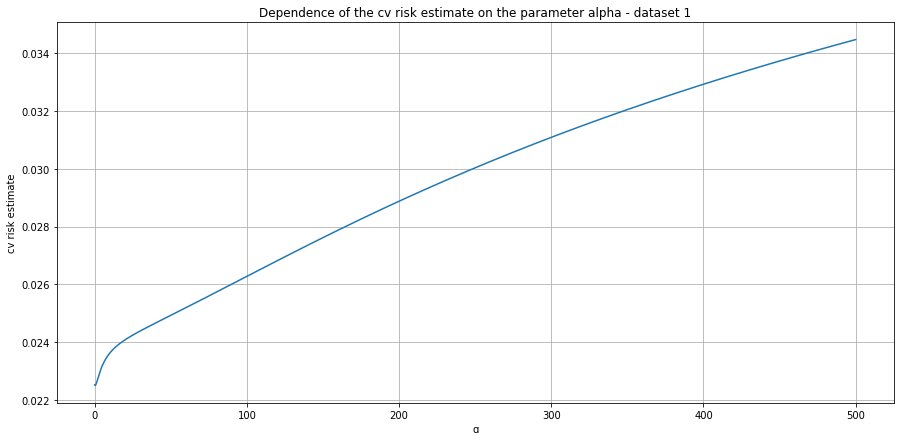

In [218]:
cv_scores = []
partitions = k_fold_split(min_max_norm_dataset, m, K)
alfas = np.linspace(0, 500, 5000)

for i in alfas:
    cv_scores.append(np.mean(cross_correlation(partitions, i)))
    
plt.figure(figsize=(15, 7))
plt.title('Dependence of the cv risk estimate on the parameter alpha - dataset 1')
plt.plot(alfas, cv_scores)
plt.xlabel("ɑ")
plt.ylabel("cv risk estimate")
plt.grid()
plt.show()

From this plot we can conclude that the cv risk estimate increseas monotonically for $\alpha \rightarrow \infty$

Let's study the behavior of the risk estimate with the other 3 datasets

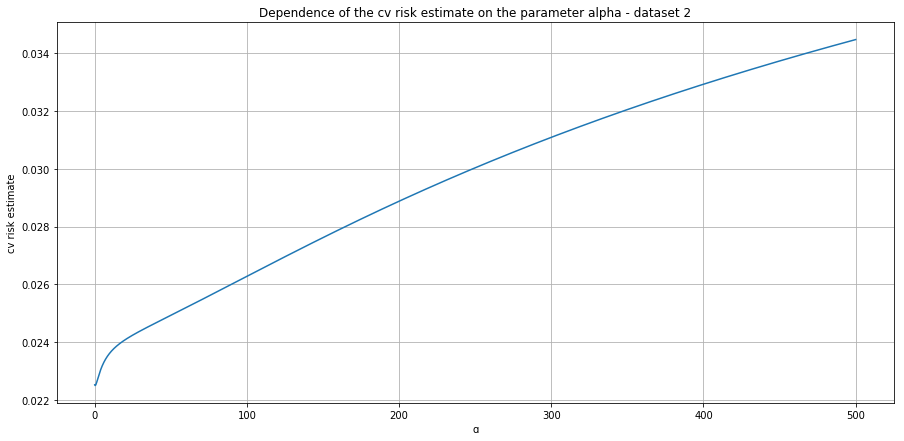

In [219]:
cv_scores = []
partitions = k_fold_split(min_max_norm_reduced_dataset, m, K)
alfas = np.linspace(0, 500, 5000)

for i in alfas:
    cv_scores.append(np.mean(cross_correlation(partitions, i)))
    
plt.figure(figsize=(15, 7))
plt.title('Dependence of the cv risk estimate on the parameter alpha - dataset 2')
plt.plot(alfas, cv_scores)
plt.xlabel("ɑ")
plt.ylabel("cv risk estimate")
plt.grid()
plt.show()

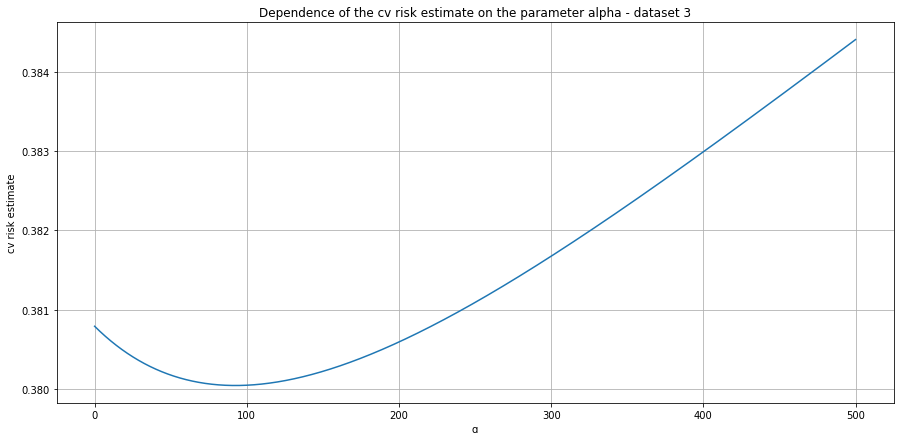

In [220]:
cv_scores = []
partitions = k_fold_split(zscore_norm_dataset, m, K)
alfas = np.linspace(0, 500, 5000)

for i in alfas:
    cv_scores.append(np.mean(cross_correlation(partitions, i)))
    
plt.figure(figsize=(15, 7))
plt.title('Dependence of the cv risk estimate on the parameter alpha - dataset 3')
plt.plot(alfas, cv_scores)
plt.xlabel("ɑ")
plt.ylabel("cv risk estimate")
plt.grid()
plt.show()

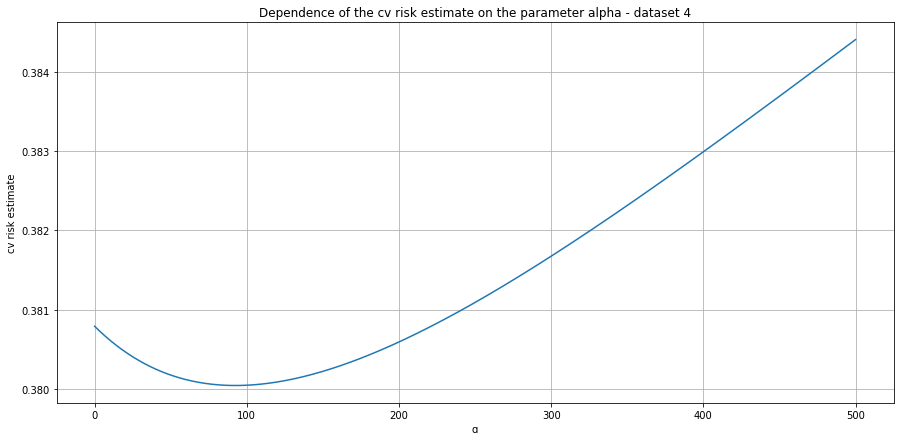

In [221]:
cv_scores = []
partitions = k_fold_split(zscore_norm_reduced_dataset, m, K)
alfas = np.linspace(0, 500, 5000)

for i in alfas:
    cv_scores.append(np.mean(cross_correlation(partitions, i)))
  
plt.figure(figsize=(15, 7))
plt.title('Dependence of the cv risk estimate on the parameter alpha - dataset 4')
plt.plot(alfas, cv_scores)
plt.xlabel("ɑ")
plt.ylabel("cv risk estimate")
plt.grid()
plt.show()

We see that for the last two datasets (z-score) there is a slight improvement by increasing alpha, so after normalizing with z-score, it's not true anymore that values towards 0 mean more accurate regressor, anyway, also in this case we have that the cv risk estimate increases as $\alpha \rightarrow \infty$ 

This means that there is a dependence of positive linear relationship between cv risk estimate and parameter alpha, in order to confirm this let's compute the correlation coefficient:

In [222]:
pearsonr(alfas, cv_scores)[0]

0.9434448863972952

This is highly confirmed by the Pearson coefficient.

## Using PCA

In [223]:
def prediction_with_PCA(alfa, x_train, y_train, x_test, y_test):
    pca = decomposition.PCA(n_components=7)
    pca.fit(x_train)
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)
    ridge_regressor.fit(x_train_pca, y_train, alfa = 0.1)
    predictions = ridge_regressor.predict(x_test_pca)
    test_error = MSE(predictions, y_test)
    return test_error

Now we can update our previous function of cross correlation by adding the PCA procedure

In [224]:
def cross_correlation_with_PCA(partitions, alfa):   
    K = len(partitions)
    vec = []

    for i in range(1, K+1):
        vec.append(i)

    vec_set = set(vec)

    scores = []
    alfa = alfa

    for i in vec:
        # S^(i) means using fold i as testing part and the rest as training

        testing_part = partitions[i]
        vec_set.remove(i)
        training_part = pd.DataFrame()

        for j in vec_set:
            training_part = training_part.append(partitions[j])

        # in this point we compute scores
        y_train = training_part["median_house_value"]
        x_train = training_part.drop("median_house_value", axis = 1)

        y_test = testing_part["median_house_value"]
        x_test = testing_part.drop("median_house_value", axis = 1)

        # UPDATE
        pca_score = prediction_with_PCA(alfa, x_train, y_train, x_test, y_test)
        
        scores.append(pca_score)

        vec_set.add(i)
    return scores

In [225]:
partitions = k_fold_split(min_max_norm_dataset, m, K)
cv_1 = np.mean(cross_correlation_with_PCA(partitions, 0.1))

partitions = k_fold_split(min_max_norm_reduced_dataset, m, K)
cv_2 = np.mean(cross_correlation_with_PCA(partitions, 0.1))

partitions = k_fold_split(zscore_norm_dataset, m, K)
cv_3 = np.mean(cross_correlation_with_PCA(partitions, 0.1))

partitions = k_fold_split(zscore_norm_reduced_dataset, m, K)
cv_4 = np.mean(cross_correlation_with_PCA(partitions, 0.1))

print(cv_1, cv_2, cv_3, cv_4)

0.17922172568213993 0.17922172568213993 0.3849041792172275 0.3849041792172275


In [226]:
cross_correlation(partitions, 0.1)

[0.289846966617546,
 0.4192351146294848,
 0.4266019475080923,
 0.4423442872729484,
 0.3259307670166458]

In [227]:
cross_correlation_with_PCA(partitions, 0.1)

[0.2644422879224533,
 0.4257608270088835,
 0.4213476029641773,
 0.4734732439056509,
 0.33949693428497235]

## optional: try nested CV to avoid choosing alpha